# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
import requests

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        
        # Check if the API request was successful (status code 200)
        if city_weather.status_code == 200:
            city_json = city_weather.json()

            # Parse out the required weather data
            city_lat = city_json["coord"]["lat"]
            city_lng = city_json["coord"]["lon"]
            city_max_temp_F = city_json["main"]["temp_max"]
            city_max_temp_C = round((city_max_temp_F - 32) * 5/9, 2)
            city_humidity = city_json["main"]["humidity"]
            city_clouds = city_json["clouds"]["all"]
            city_wind = city_json["wind"]["speed"]
            city_country = city_json["sys"]["country"]
            city_date = city_json["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp_C,  # Use Celsius temperature
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"City not found ({city}). Skipping...")

    # Handle any exceptions or errors
    except Exception as e:
        print(f"Error occurred while processing {city}: {str(e)}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | little cayman
City not found (little cayman). Skipping...
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | corte
Processing Record 4 of Set 1 | archangelos
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | labrador city
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | upington
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | altay
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | howrah
Processing Record 13 of Set 1 | arhavi
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | pueblo west
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | gierloz
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | callao
Processing Record 

Processing Record 34 of Set 4 | lazaro cardenas
Processing Record 35 of Set 4 | arauca
Processing Record 36 of Set 4 | campos belos
Processing Record 37 of Set 4 | manay
Processing Record 38 of Set 4 | pitimbu
Processing Record 39 of Set 4 | ilulissat
Processing Record 40 of Set 4 | port mathurin
Processing Record 41 of Set 4 | kampene
Processing Record 42 of Set 4 | natal
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | itoman
Processing Record 45 of Set 4 | 'ohonua
City not found ('ohonua). Skipping...
Processing Record 46 of Set 4 | snowflake
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | limbe
Processing Record 49 of Set 4 | anadyr
Processing Record 0 of Set 5 | fada
Processing Record 1 of Set 5 | rivera
Processing Record 2 of Set 5 | agua preta
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | qaqortoq
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | teofilo otoni
Processing Record 7 

Processing Record 21 of Set 8 | vingt cinq
City not found (vingt cinq). Skipping...
Processing Record 22 of Set 8 | chilliwack
Processing Record 23 of Set 8 | saint-philippe
Processing Record 24 of Set 8 | sena madureira
Processing Record 25 of Set 8 | calvi
Processing Record 26 of Set 8 | guajara mirim
Processing Record 27 of Set 8 | san borja
Processing Record 28 of Set 8 | dompu
Processing Record 29 of Set 8 | korla
Processing Record 30 of Set 8 | bonito
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | mata-utu
Processing Record 33 of Set 8 | kollam
Processing Record 34 of Set 8 | nemuro
Processing Record 35 of Set 8 | nova sintra
Processing Record 36 of Set 8 | hayma'
City not found (hayma'). Skipping...
Processing Record 37 of Set 8 | uliastay
Processing Record 38 of Set 8 | sekong
Processing Record 39 of Set 8 | severo-yeniseyskiy
Processing Record 40 of Set 8 | coxen hole
Processing Record 41 of Set 8 | whitecourt
Processing Record 42 of Set 8 | alaghsas


Processing Record 7 of Set 12 | shimonoseki
Processing Record 8 of Set 12 | boende
Processing Record 9 of Set 12 | changde
Processing Record 10 of Set 12 | malango
Processing Record 11 of Set 12 | camara de lobos
Processing Record 12 of Set 12 | basco
Processing Record 13 of Set 12 | vila franca do campo
Processing Record 14 of Set 12 | bayganin
Processing Record 15 of Set 12 | gebeit
Processing Record 16 of Set 12 | pokhara
Processing Record 17 of Set 12 | nezhinka
Processing Record 18 of Set 12 | chibougamau
Processing Record 19 of Set 12 | nova vicosa
Processing Record 20 of Set 12 | sharypovo
Processing Record 21 of Set 12 | katsuura
Processing Record 22 of Set 12 | hithadhoo
Processing Record 23 of Set 12 | abraham's bay
City not found (abraham's bay). Skipping...
Processing Record 24 of Set 12 | santa cruz
Processing Record 25 of Set 12 | bang saphan
Processing Record 26 of Set 12 | nadi
Processing Record 27 of Set 12 | badiyah
Processing Record 28 of Set 12 | salinas
Processing 

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,1.85,87,100,20.71,CA,1696010147
1,corte,42.2500,9.2500,20.98,68,2,4.29,FR,1696010411
2,archangelos,36.2149,28.1149,24.99,76,6,9.84,GR,1696010412
3,waitangi,-43.9535,-176.5597,9.90,94,80,4.00,NZ,1696010138
4,labrador city,52.9463,-66.9114,14.95,44,40,0.00,CA,1696009918


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,1.85,87,100,20.71,CA,1696010147
1,corte,42.2500,9.2500,20.98,68,2,4.29,FR,1696010411
2,archangelos,36.2149,28.1149,24.99,76,6,9.84,GR,1696010412
3,waitangi,-43.9535,-176.5597,9.90,94,80,4.00,NZ,1696010138
4,labrador city,52.9463,-66.9114,14.95,44,40,0.00,CA,1696009918


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

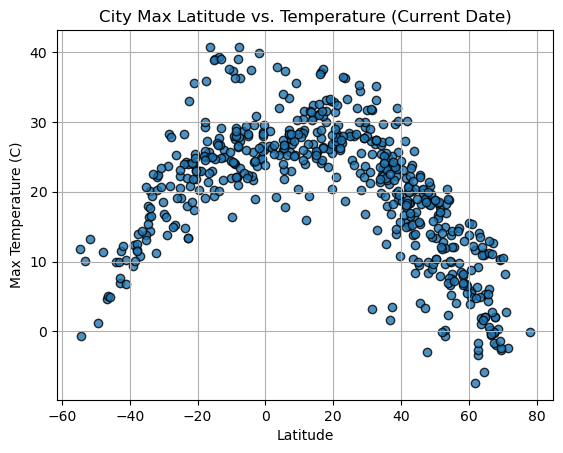

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o",alpha =0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

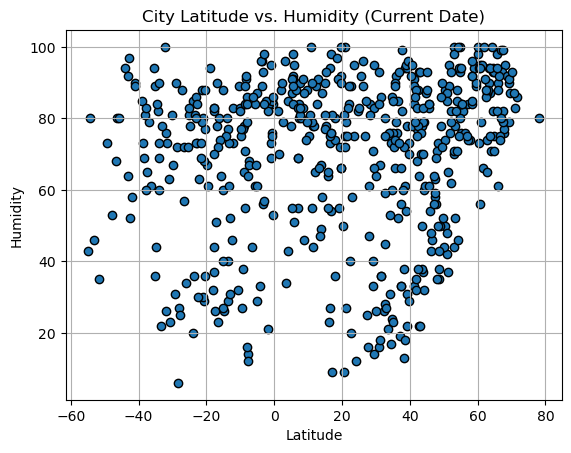

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

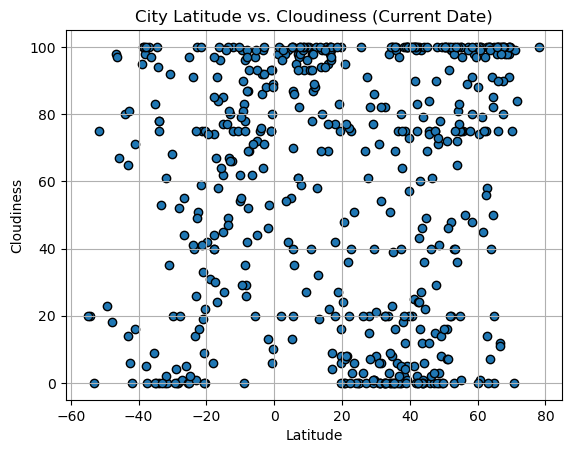

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

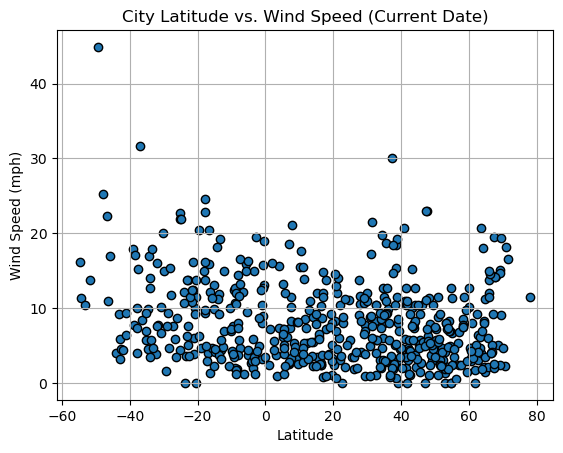

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, Yname, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel("Latitude")
    plt.ylabel(Yname)
    print(f"The r-Value is: {r_value}")

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,1.85,87,100,20.71,CA,1696010147
1,corte,42.2500,9.2500,20.98,68,2,4.29,FR,1696010411
2,archangelos,36.2149,28.1149,24.99,76,6,9.84,GR,1696010412
4,labrador city,52.9463,-66.9114,14.95,44,40,0.00,CA,1696009918
7,hamilton,39.1834,-84.5333,25.70,78,100,0.00,US,1696010144


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,9.90,94,80,4.00,NZ,1696010138
5,adamstown,-25.0660,-130.1015,20.55,81,97,22.75,PN,1696010135
6,upington,-28.4478,21.2561,28.21,6,0,4.61,ZA,1696010120
9,puerto natales,-51.7236,-72.4875,13.25,35,75,13.80,CL,1696009869
14,port-aux-francais,-49.3500,70.2167,1.18,73,23,44.90,TF,1696010136


###  Temperature vs. Latitude Linear Regression Plot

The r-Value is: -0.8123886064423649


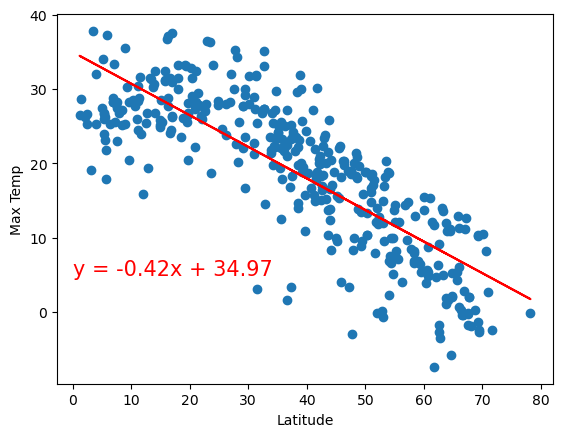

In [29]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp" ,(0, 5))

The r-Value is: 0.7411491302801105


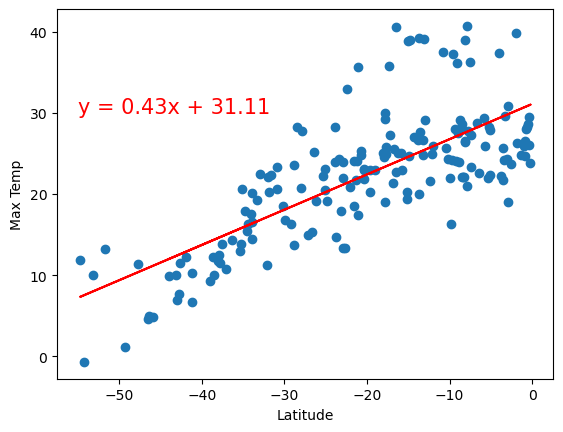

In [30]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-55, 30))

**Discussion about the linear relationship:** 

In the context of linear regression analysis within the Northern Hemisphere, it reveals a negative association, signifying that as latitude values increase, there is a tendency for temperatures to decrease. Conversely, in the Southern Hemisphere, the linear regression reveals a positive correlation, indicating that temperatures tend to increase as latitude values rise.

### Humidity vs. Latitude Linear Regression Plot

The r-Value is: 0.1485457473777945


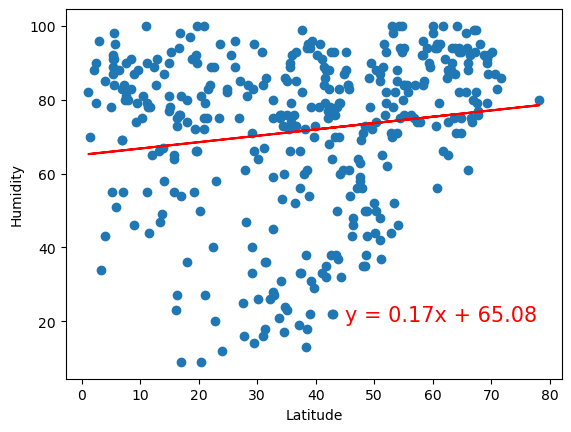

In [31]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (45, 20))

The r-Value is: 0.02096642704482015


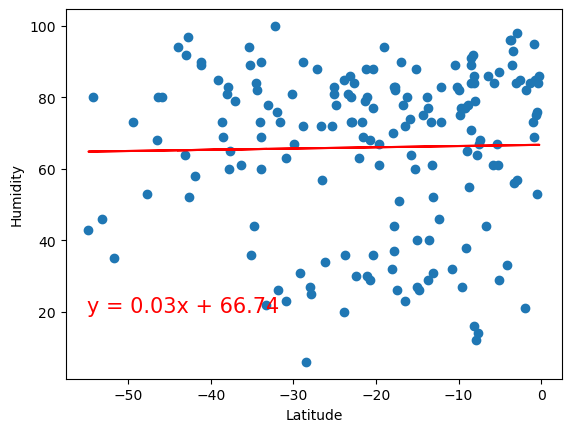

In [32]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-55, 20))

**Discussion about the linear relationship:** 

The linear regression line for the Northern Hemisphere displays a slight positive correlation, while the Southern Hemisphere's linear regression line exhibits such a slight positive correlation which is almost no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-Value is: 0.044533236605950044


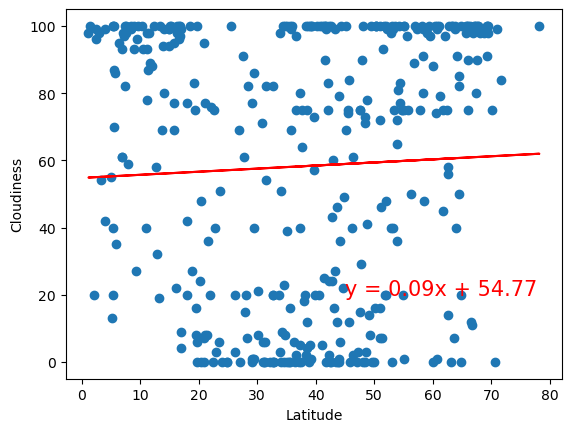

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (45, 20))

The r-Value is: 0.2808905053673978


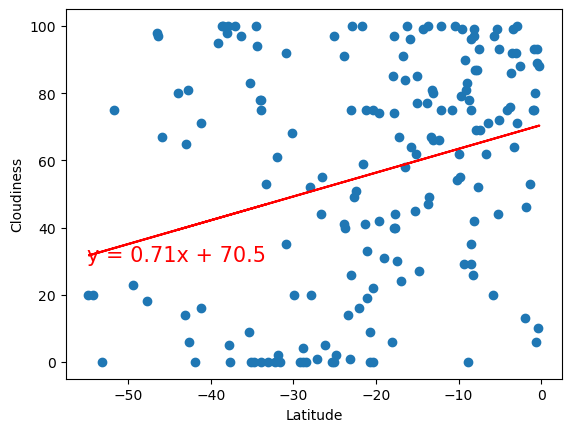

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55, 30))

**Discussion about the linear relationship:** 

Both of the regression lines depict a positive linear association between latitude and cloudiness in both the Northern and Southern Hemispheres. Notably, the Northern Hemisphere's regression line exhibits a slightly weaker positive relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-Value is: 0.0051504144532025665


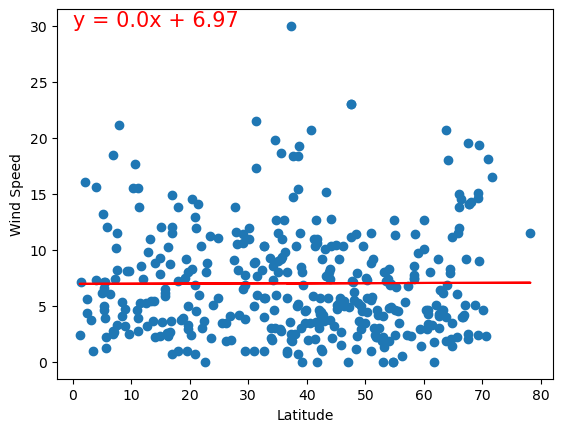

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (0, 30))

The r-Value is: -0.22835990890265143


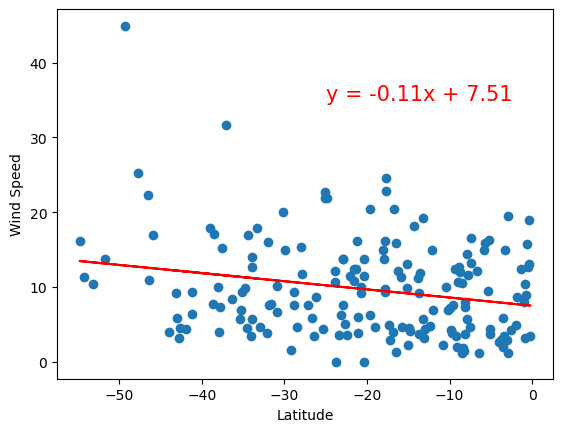

In [36]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-25, 35))

**Discussion about the linear relationship:** 

The regression line in the Northern Hemisphere illustrates no apparent linear association, whereas the regression line in the Southern Hemisphere portrays a negative linear relationship.